In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib notebook
import sys

# ACDC utils
sys.path.append('/workspace/DQTools')
from utils import *

/opt/tljh/user/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


### FES2014 tide height model

In [3]:
# Get tide elevation dataset

product = 'fes2014'
subproduct = ['tide_elevation']

start=dt.datetime(2020, 1, 1)
stop=dt.datetime(2020, 12, 31)

tile = 'UK'

ds = get_data(product, subproduct, start, stop, tile)

In [4]:
ds

[<xarray.Dataset>
 Dimensions:         (latitude: 1100, longitude: 1550, time: 8761)
 Coordinates:
   * latitude        (latitude) float64 59.99 59.98 59.98 ... 49.02 49.02 49.0
   * longitude       (longitude) float64 -11.99 -11.98 -11.97 ... 3.485 3.495
   * time            (time) datetime64[ns] 2020-01-01 ... 2020-12-31
 Data variables:
     tide_elevation  (time, latitude, longitude) float32 dask.array<shape=(8761, 1100, 1550), chunksize=(744, 256, 256)>
 Attributes:
     transform:      [-12.0, 0.01, 0.0, 60.0, 0.0, -0.01]
     crs:            +init=epsg:4326
     res:            (0.01, 0.01)
     is_tiled:       1
     AREA_OR_POINT:  Area
     product:        fes2014
     version:        2.9.3]

In [5]:
# Set variables for individual band
tide = ds[0].tide_elevation

<IPython.core.display.Javascript object>


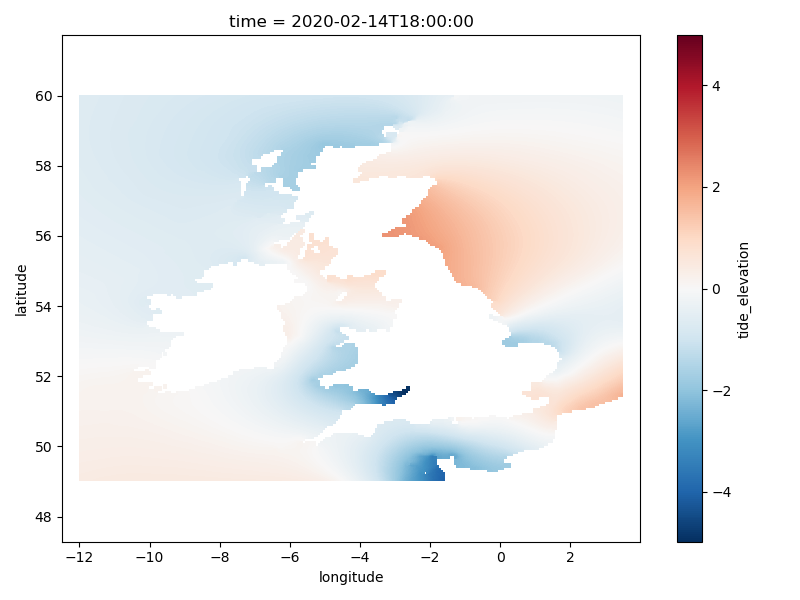

In [17]:
# Plot the tide elevation for a single date
fig, cx = plt.subplots(figsize=(8,6))

tide.sel(time='2020-02-14T18:00', method='nearest') .plot.imshow(ax=cx)
plt.axis('equal')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


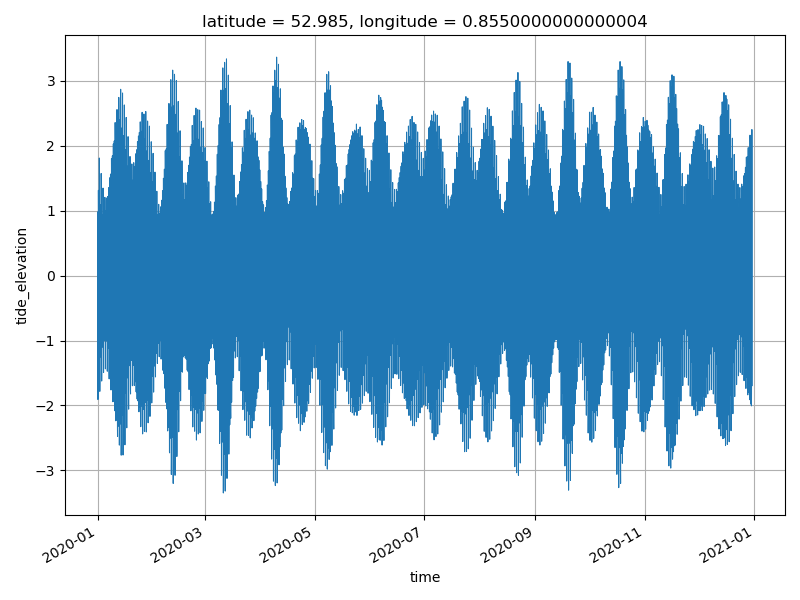

In [16]:
# Plot the tide location
fig, dx = plt.subplots(figsize=(8,6))

# Norfolk coast AONB
lat, lon = 52.984550, 0.859931

subset_tide = tide.sel(longitude=lon, latitude=lat, method='nearest')
subset_tide.plot(ax=dx, lw=0.75)

plt.grid()
plt.tight_layout()
plt.show()

In [29]:
# Get Sentinel-1 acquisition times
product = 'S1_GRD'
subproduct = ['VH_desc']
tile = 'OS'

start = dt.datetime(2020, 1, 10)
stop = dt.datetime(2020, 12, 31)

ds = get_data(product, subproduct, start, stop, tile)

In [30]:
ds[0].VH_desc.time.data

array(['2020-01-19T00:00:00.000000000', '2020-01-31T00:00:00.000000000',
       '2020-02-12T00:00:00.000000000', '2020-02-24T00:00:00.000000000',
       '2020-03-07T00:00:00.000000000', '2020-03-19T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-04-12T00:00:00.000000000',
       '2020-04-24T00:00:00.000000000', '2020-05-06T00:00:00.000000000',
       '2020-05-18T00:00:00.000000000', '2020-05-30T00:00:00.000000000',
       '2020-06-11T00:00:00.000000000', '2020-06-23T00:00:00.000000000',
       '2020-07-05T00:00:00.000000000', '2020-07-17T00:00:00.000000000',
       '2020-07-29T00:00:00.000000000', '2020-08-10T00:00:00.000000000',
       '2020-08-22T00:00:00.000000000', '2020-09-03T00:00:00.000000000',
       '2020-09-15T00:00:00.000000000', '2020-09-27T00:00:00.000000000',
       '2020-10-09T00:00:00.000000000', '2020-10-21T00:00:00.000000000',
       '2020-11-02T00:00:00.000000000', '2020-11-14T00:00:00.000000000',
       '2020-11-26T00:00:00.000000000', '2020-12-20

<IPython.core.display.Javascript object>


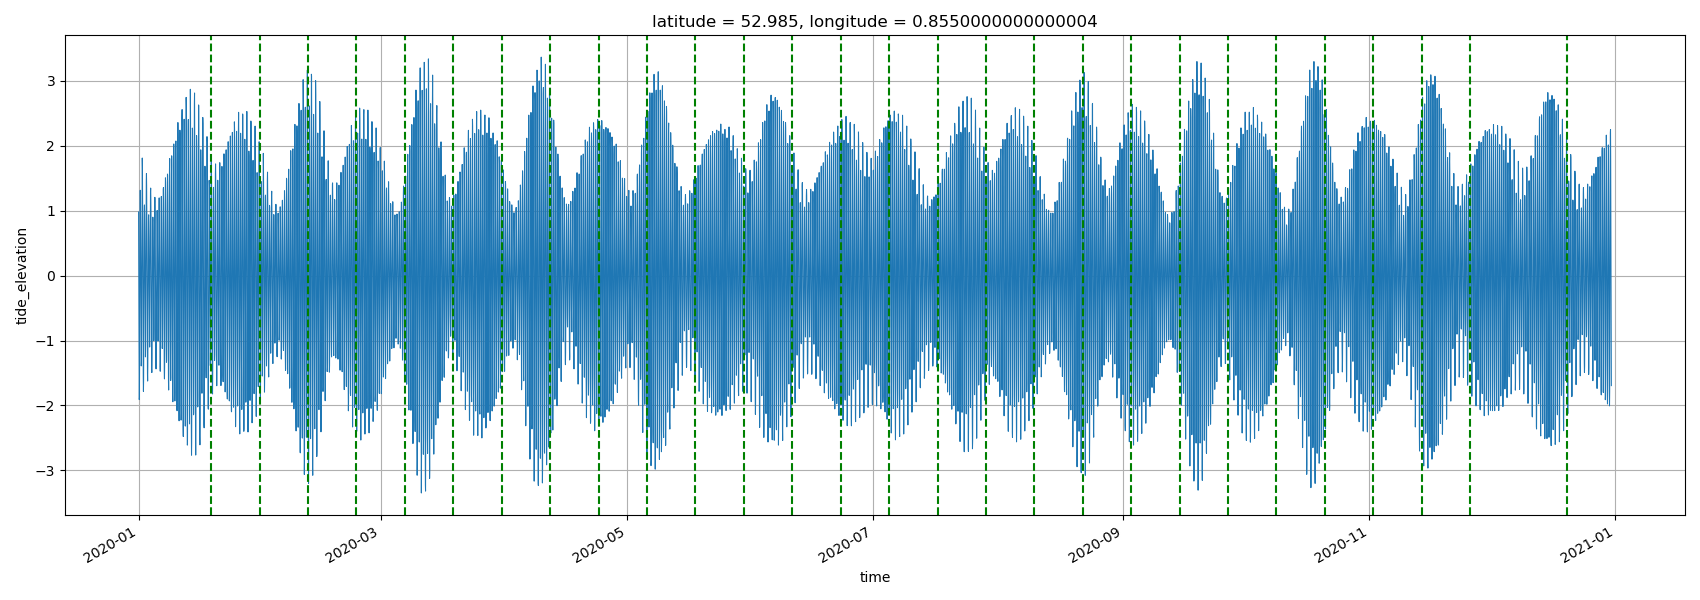

In [32]:
# Plot Sentinel-1 acquisition times and tide height
fig, ex = plt.subplots(figsize=(17,6))

dx = subset_tide.plot(lw=0.75)

plt.grid()
plt.tight_layout()

for _time in ds[0].VH_desc.time.data:
    plt.axvline(_time, color="green", linestyle="dashed")

plt.show()